In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from predictPy import Analisis_Predictivo
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")


In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
#import standardScaler
from sklearn.preprocessing import StandardScaler


In [3]:
class cmatrixelements():
    def __init__(self, m = None):
        self.__m = m
    @property
    def m(self):
        return self.__m
    @m.setter
    def m(self, m):
        self.__m = m
    def calculatem(self):
        #get the dictionary m and extract the array elements 
        self.m = self.m['Matriz de Confusión']
        #calculate global accuracy
        print(self.m)
        ga = (self.m[0][0] + self.m[1][1]) / (self.m[0][0] + self.m[1][1] + self.m[0][1] + self.m[1][0])
        #calculate global error
        ge = 1 - ga
        #calculate positive precision and negative precision
        #m[1][1] / (m[1][0] + m[1][1])
        np = self.m[0][0] / (self.m[0][0] + self.m[0][1])
        pp = self.m[1][1] / (self.m[1][1] + self.m[1][0])
        #calculate proporcion of false positives and false negatives
        fp = self.m[0][1] / (self.m[0][1] + self.m[0][0])
        fn = self.m[1][0] / (self.m[1][0] + self.m[1][1])
        #positivity assertivity and negative
        pa = self.m[1][1] / (self.m[0][1] + self.m[1][1])
        na = self.m[0][0] / (self.m[0][0] + self.m[1][0])
        dic = {"Global Accuracy":ga, "Global Error":ge, "Positive Precision":pp, "Negative Precision":np, "False Positives":fp, "False Negatives":fn, "Positive Assertivity":pa, "Negative Assertivity":na}
        #dicItems= dic.items()
        #dicItems = list(dic.items())
        #dic = pd.DataFrame(list(dic.items()))
        #dic=dic.T
        dic = pd.DataFrame(list(dic.items())).T
        dic.columns = dic.iloc[0]
        dic = dic.drop(dic.index[0])
        print(dic)
        return dic
        #create a dictionary
        #return {"global accuracy":ga, "global error":ge, "positive precision":pp, "negative precision":np, "false positives":fp, "false negatives":fn, "positive assertivity":pa, "negative assertivity":na}
    def __str__(self):
        return print(self.calculatem())

### Ejercicio 1: [30 puntos] En este ejercicio vamos a usar la tabla de datos raisin.csv, que contiene es resultado de un sistema de visión artificial para distinguir entre dos variedades diferentes de pasas (Kecimen y Besni) cultivadas en Turquía. Estas imágenes se sometieron a varios pasos de preprocesamiento y se realizaron 7 operaciones de extracción de características morfológicas utilizando técnicas de procesamiento de imágenes.

1. Use Máquinas de Soporte Vectorial en Python para generar un modelo predictivo para la tabla raisin.csv usando el 80 % de los datos para la tabla aprendizaje y un 20 % para la tabla testing. Obtenga los índices de precisión e interprete los resultados.

In [4]:
df = pd.read_csv('raisin.csv')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
analisis_raisin = Analisis_Predictivo(df, predecir='Class')

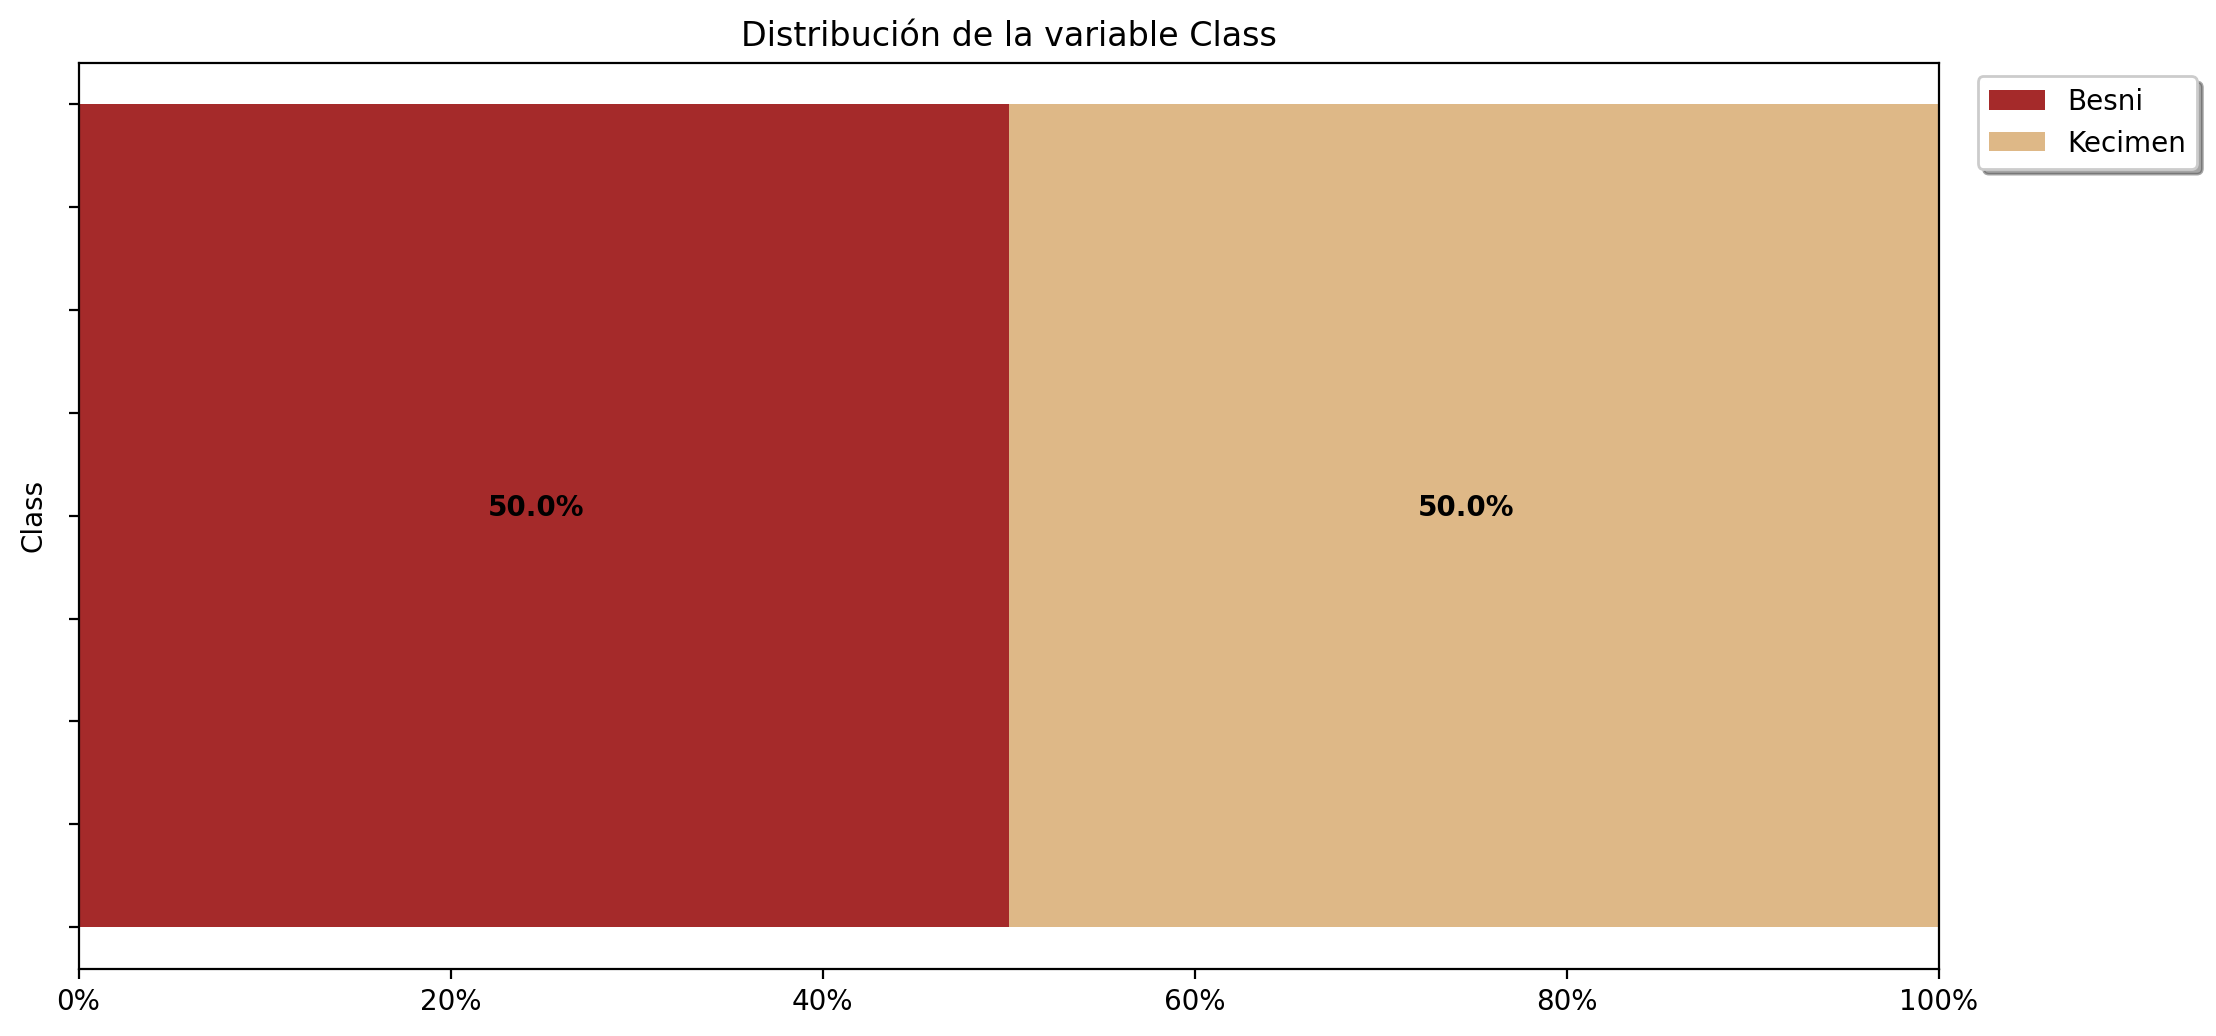

In [7]:
analisis_raisin.distribucion_variable_predecir()

In [8]:
raisin_svm = SVC(kernel='rbf')
analisis_raisin = Analisis_Predictivo(df, predecir='Class', modelo=raisin_svm, train_size=0.75)

In [9]:
resultados_raisin = analisis_raisin.fit_predict_resultados()


Matriz de Confusión:
[[97 19]
 [11 98]]

Precisión Global:
0.8666666666666667

Error Global:
0.1333333333333333

Precisión por categoría:
      Besni   Kecimen
0  0.836207  0.899083


2. Repita el  ́ıtem anterior pero intente identificar el mejor n ́ucleo (Kernel) y valor para el
par ́ametro de regularizaci ́on C. ¿Mejora la predicci ́on?

In [10]:
#divide the df
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print (X.head())
print (y.head())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter  
0  0.758651   1184.040  
1  0.684130   1121.786  
2  0.637613   1208.575  
3  0.699599    844.162  
4  0.792772   1073.251  
0    Kecimen
1    Kecimen
2    Kecimen
3    Kecimen
4    Kecimen
Name: Class, dtype: object


In [11]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
#create a pipeline
pipe = make_pipeline(SVC(kernel='rbf'))


Aquí se revisa todos los KERNELS

In [13]:
#create a dictionary with the hiperparameters to test
grid_parameters = [
                    {'svc__C': [1, 10], 'svc__gamma': [0.1]},
                    {'svc__C': [1, 10], 'svc__gamma': [0.1], 'svc__kernel': ['linear']},
                    {'svc__kernel': ['poly'], 'svc__degree': [2, 3]},
                    {'svc__C': [1, 10], 'svc__gamma': [0.1], 'svc__kernel': ['sigmoid']},]
#create a gridsearch object
grid_search = GridSearchCV(pipe, grid_parameters) # fit grid seaarch

In [14]:

best_model = grid_search.fit(X_train, y_train) # fit the best model

In [15]:
#print the model settings and the best parameters
print("Best model: ", best_model.best_estimator_)
print("Best parameters: ", best_model.best_params_)
print("Best score: ", best_model.best_score_)


Best model:  Pipeline(steps=[('svc', SVC(C=1, gamma=0.1, kernel='linear'))])
Best parameters:  {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'linear'}
Best score:  0.8666666666666666


In [16]:
raisin_svm = SVC(kernel='linear', C = 1, gamma = 0.1)
analisis_raisin = Analisis_Predictivo(df, predecir='Class', modelo=raisin_svm, train_size=0.75)

In [17]:
resultados_raisin = analisis_raisin.fit_predict_resultados()


Matriz de Confusión:
[[ 91  15]
 [ 10 109]]

Precisión Global:
0.8888888888888888

Error Global:
0.11111111111111116

Precisión por categoría:
      Besni   Kecimen
0  0.858491  0.915966


A nivel general se mejora la predicción a un 88%, además por categoría se tienen mejor predicción.

3. Construya un DataFrame que compare el mejor modelo generado arriba contra los mejores modelos construidos en tareas anteriores para la tabla raisin.csv. Para esto en cada una de las filas debe aparecer un modelo predictivo y que en las columnas aparezcan los  ́ındices  Precision Global, Error Global, Precision Positiva (PP) y Precision Negativa (PN). ¿Cual de los modelos es mejor para estos datos?

In [18]:
raisin_svm = cmatrixelements(resultados_raisin)
df_raisin_svm = raisin_svm.calculatem()
df_raisin_svm["Modelo"] = "SVM Linear C=1, gamma=0.1 raisin"

[[ 91  15]
 [ 10 109]]
0 Global Accuracy Global Error Positive Precision Negative Precision  \
1        0.888889     0.111111           0.915966           0.858491   

0 False Positives False Negatives Positive Assertivity Negative Assertivity  
1        0.141509        0.084034             0.879032              0.90099  


In [19]:
df_raisin_svm.head()

,Global Accuracy,Global Error,Positive Precision,Negative Precision,False Positives,False Negatives,Positive Assertivity,Negative Assertivity,Modelo
1,0.888889,0.111111,0.915966,0.858491,0.141509,0.084034,0.879032,0.90099,"SVM Linear C=1, gamma=0.1 raisin"


In [136]:
df_matrix.head(10)

,Modelo,Global Accuracy,Global Error,Positive Precision,Negative Precision,False Positives,False Negatives,Positive Assertivity,Negative Assertivity
0,KNN,0.875556,0.124444,0.895238,0.858333,0.141667,0.104762,0.846847,0.903509
1,KNN,0.884444,0.115556,0.843478,0.927273,0.072727,0.156522,0.92381,0.85
2,Decision Tree,0.838889,0.161111,0.822222,0.855556,0.144444,0.177778,0.850575,0.827957
3,RandomForest,0.830868,0.169132,0.361194,0.959836,0.040164,0.638806,0.711765,0.845487
4,AdaBoost,0.778378,0.221622,0.488971,0.855327,0.144673,0.511029,0.47331,0.862919
5,GradientBoosting,0.820077,0.179923,0.380137,0.948156,0.051844,0.619863,0.680982,0.840106
6,RandomForest,0.83537,0.16463,0.33121,0.962933,0.037067,0.66879,0.693333,0.850534
7,AdaBoost,0.76139,0.23861,0.418868,0.849515,0.150485,0.581132,0.417293,0.85034
8,GradientBoosting,0.848649,0.151351,0.37395,0.955535,0.044465,0.62605,0.654412,0.871441
9,"SVM Linear C=1, gamma=0.1 raisin",0.875556,0.124444,0.911765,0.845528,0.154472,0.088235,0.830357,0.920354


KNN Y SVM (Linear) con 87 % de precisión global, sigue siendo el mejor para analisar la tabla raisin.csv. En precisión Positiva El mejor es Random Forest y en cuanto a la precisión Negativa es el SVM. Dependería de loque buscamos predecír en ese caso.

## Ejercicio 2: [45 puntos] En este ejercicio usaremos la tabla de datos abandono clientes.csv, que contiene los detalles de los clientes de un banco

1. Cargue en Python la tabla de datos abandono clientes.csv

In [21]:
df_clientes = pd.read_csv('abandono_clientes.csv', index_col=0)
df_clientes.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,619,France,Female,42,2,0.00,1,Si,Si,101348.88,Si
2,608,Spain,Female,41,1,83807.86,1,No,Si,112542.58,No
3,502,France,Female,42,8,159660.80,3,Si,No,113931.57,Si
4,699,France,Female,39,1,0.00,2,No,No,93826.63,No
5,850,Spain,Female,43,2,125510.82,1,Si,Si,79084.10,No


2. Use Maquinas de Soporte Vectorial en Python (con los par ́ametros por defecto) para generar un modelo predictivo para la tabla abandono clientes.csv usando el 75 % de
los datos para la tabla aprendizaje y un 25 % para la tabla testing, luego calcule para los datos de testing la matriz de confusion, la precisi ́on global y la precisi ́on para cada una
de las dos categorıas. ¿Son buenos los resultados? Explique.

In [22]:
analisis_clientes_ = Analisis_Predictivo(df_clientes, predecir='Exited')

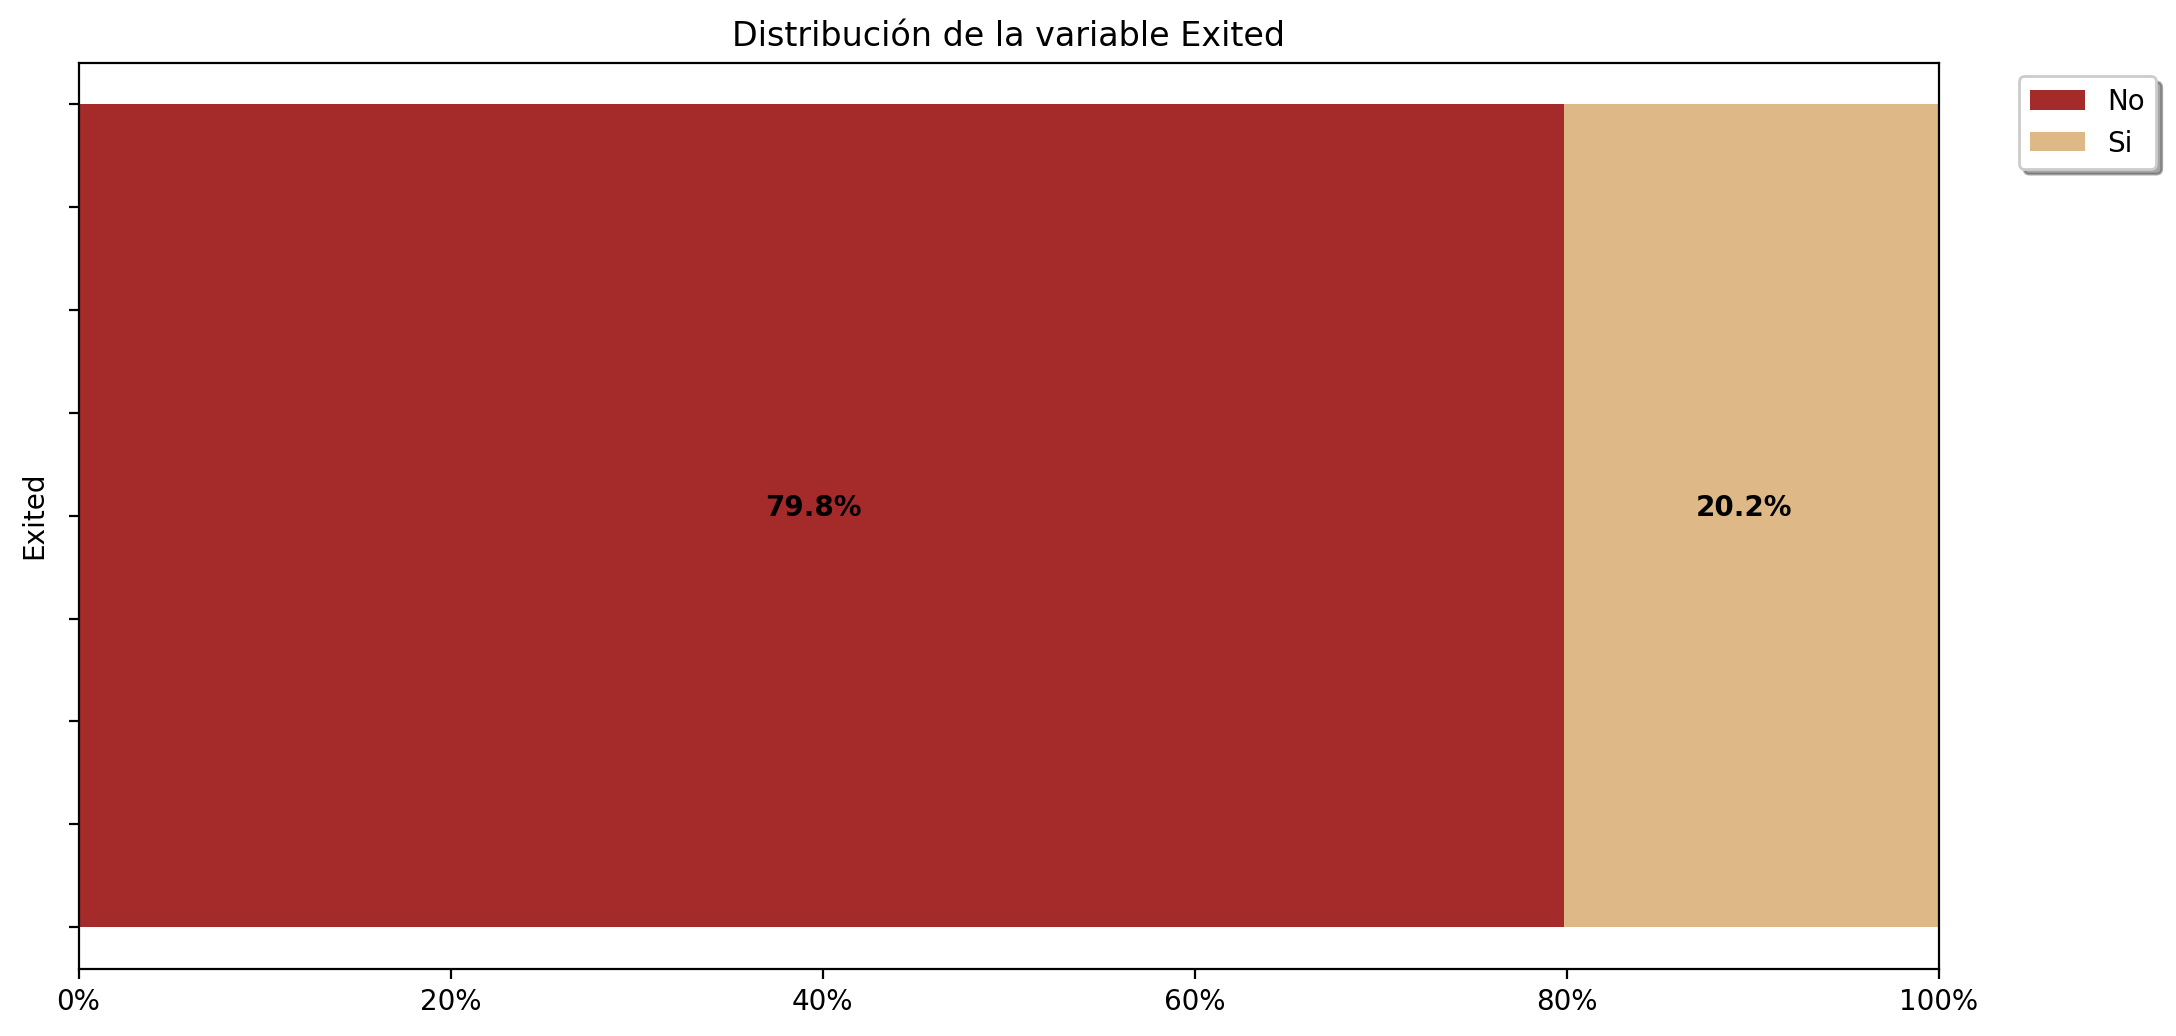

In [23]:
analisis_clientes_.distribucion_variable_predecir()

In [24]:
#Extract the numeric columns of the dataframe
df_clientes_num = df_clientes._get_numeric_data()
df_clientes_num = df_clientes_num.iloc[:, :-1]
#add the Exited column to the dataframe
df_clientes_num['Exited'] = df_clientes['Exited']

In [25]:
df_clientes_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,Exited
1,619,42,2,0.00,1,Si
2,608,41,1,83807.86,1,No
3,502,42,8,159660.80,3,Si
4,699,39,1,0.00,2,No
5,850,43,2,125510.82,1,No


In [26]:
clientes_svm = SVC(kernel='rbf')
analisis_clientes = Analisis_Predictivo(df_clientes_num, predecir='Exited', modelo=clientes_svm, train_size=0.75)

In [27]:
analisis_clientes.fit_predict_resultados()


Matriz de Confusión:
[[1012   24]
 [ 179   80]]

Precisión Global:
0.8432432432432433

Error Global:
0.1567567567567567

Precisión por categoría:
         No       Si
0  0.976834  0.30888


{'Matriz de Confusión': array([[1012,   24],
        [ 179,   80]], dtype=int64),
 'Precisión Global': 0.8432432432432433,
 'Error Global': 0.1567567567567567,
 'Precisión por categoría':          No       Si
 0  0.976834  0.30888}

Se tiene una buena precisión global con un 85%. Sin embargo, la Categoría de No es muy alta 97% esto podría servír muy bien para predecír los clientes que No abandonarían el banco. Al contrario la categoría de si tiene un 22% de precisión. Esto es muy bajo para predecir esta categoría.

3. Repita el  ́ıtem anterior pero intente identificar el mejor n ́ucleo (Kernel) y valor para el par ́ametro de regularizaci ́on C. ¿Mejora la predicci ́on?

In [28]:
#divide the df
X = df_clientes_num.iloc[:, :-2]
y = df_clientes_num.iloc[:, -1]
print (X.head())
print (y.head())

   CreditScore  Age  Tenure    Balance
1          619   42       2       0.00
2          608   41       1   83807.86
3          502   42       8  159660.80
4          699   39       1       0.00
5          850   43       2  125510.82
1    Si
2    No
3    Si
4    No
5    No
Name: Exited, dtype: object


In [29]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=0)

In [63]:
#improt PCA
#from sklearn.decomposition import PCA   #import PCA

In [69]:
#create a pipeline with the model and StandardScaler
pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf'))#Not implemented,PCA(n_components=2)

In [73]:
#create a dictionary with the hiperparameters to test
grid_parameters = [
                    {'svc__gamma': [0.1]},
                    {'svc__kernel': ['linear']},
                    {'svc__kernel': ['poly'], 'svc__degree': [2, 3]},
                    {'svc__kernel': ['sigmoid']}
                    ]
#create a gridsearch object
grid_search = GridSearchCV(pipe, grid_parameters,  cv=5, verbose=0,n_jobs=-1) # fit grid seaarch

In [74]:
best_model = grid_search.fit(X_train, y_train) # fit the best model

In [75]:
#print the model settings and the best parameters
print("Best model: ", best_model.best_estimator_)
print("Best parameters: ", best_model.best_params_)
print("Best score: ", best_model.best_score_)

Best model:  Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(gamma=0.1))])
Best parameters:  {'svc__gamma': 0.1}
Best score:  0.822908622908623


In [78]:
clientes_svm = SVC(kernel='rbf')
analisis_clientes = Analisis_Predictivo(df_clientes_num, predecir='Exited', modelo=clientes_svm, train_size=0.75)

In [79]:
resultados_clientes1 = analisis_clientes.fit_predict_resultados()


Matriz de Confusión:
[[1014   12]
 [ 211   58]]

Precisión Global:
0.8277992277992278

Error Global:
0.17220077220077223

Precisión por categoría:
         No        Si
0  0.988304  0.215613


4. Con los mejores par ́ametros identificados en el  ́ıtem anterior realice un nuevo modelo pero
haciendo selecci ́on de 6 variables. ¿Mejoran los resultados?

In [ ]:
#Extract the numeric columns of the dataframe 6 variables
df_clientes_num = df_clientes._get_numeric_data()
#add the Exited column to the dataframe
df_clientes_num['Exited'] = df_clientes['Exited']

In [ ]:
df_clientes_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
1,619,42,2,0.00,1,101348.88,Si
2,608,41,1,83807.86,1,112542.58,No
3,502,42,8,159660.80,3,113931.57,Si
4,699,39,1,0.00,2,93826.63,No
5,850,43,2,125510.82,1,79084.10,No


In [ ]:
clientes_svm = SVC(kernel='poly', degree=2)
analisis_clientes = Analisis_Predictivo(df_clientes_num, predecir='Exited', modelo=clientes_svm, train_size=0.75)

In [ ]:
resultados_clientes2 = analisis_clientes.fit_predict_resultados()


Matriz de Confusión:
[[1026    6]
 [ 227   36]]

Precisión Global:
0.8200772200772201

Error Global:
0.17992277992277994

Precisión por categoría:
         No        Si
0  0.994186  0.136882


In [121]:
resultados_clientes2

{'Matriz de Confusión': array([[1026,    6],
        [ 227,   36]], dtype=int64),
 'Precisión Global': 0.8200772200772201,
 'Error Global': 0.17992277992277994,
 'Precisión por categoría':          No        Si
 0  0.994186  0.136882}

5. Construya un DataFrame que compare el mejor modelo generado arriba contra los mejores
modelos construidos en tareas anteriores para la tabla abandono clientes.csv. Para esto
en cada una de las filas debe aparecer un modelo predictivo y en las columnas aparezcan
los  ́ındices Precisi ́on Global, Error Global, Precisi ́on Positiva (PP) y Precisi ́on Negativa
(PN). ¿Cu ́al de los modelos es mejor para estos datos?

In [ ]:
clientes_svm2 = cmatrixelements(resultados_clientes2)
df_clientes_svm2 = clientes_svm2.calculatem()
df_clientes_svm2["Modelo"] = "SVM POLY Clientes"

[[1028    3]
 [ 232   32]]
0 Global Accuracy Global Error Positive Precision Negative Precision  \
1        0.818533     0.181467           0.121212            0.99709   

0 False Positives False Negatives Positive Assertivity Negative Assertivity  
1         0.00291        0.878788             0.914286             0.815873  


In [ ]:
df_matrix = pd.read_csv("Resultados.csv", index_col=0)
df_matrix.head()

,Modelo,Global Accuracy,Global Error,Positive Precision,Negative Precision,False Positives,False Negatives,Positive Assertivity,Negative Assertivity
0,KNN,0.875556,0.124444,0.895238,0.858333,0.141667,0.104762,0.846847,0.903509
1,KNN,0.884444,0.115556,0.843478,0.927273,0.072727,0.156522,0.923810,0.850000
2,Decision Tree,0.838889,0.161111,0.822222,0.855556,0.144444,0.177778,0.850575,0.827957
3,RandomForest,0.830868,0.169132,0.361194,0.959836,0.040164,0.638806,0.711765,0.845487
4,AdaBoost,0.778378,0.221622,0.488971,0.855327,0.144673,0.511029,0.473310,0.862919


In [ ]:
df_matrix = pd.concat([df_matrix,df_raisin_svm, df_clientes_svm2], ignore_index=True)
df_matrix.head()

,Modelo,Global Accuracy,Global Error,Positive Precision,Negative Precision,False Positives,False Negatives,Positive Assertivity,Negative Assertivity
0,KNN,0.875556,0.124444,0.895238,0.858333,0.141667,0.104762,0.846847,0.903509
1,KNN,0.884444,0.115556,0.843478,0.927273,0.072727,0.156522,0.92381,0.85
2,Decision Tree,0.838889,0.161111,0.822222,0.855556,0.144444,0.177778,0.850575,0.827957
3,RandomForest,0.830868,0.169132,0.361194,0.959836,0.040164,0.638806,0.711765,0.845487
4,AdaBoost,0.778378,0.221622,0.488971,0.855327,0.144673,0.511029,0.47331,0.862919


In [135]:
df_matrix.to_csv("Resultados.csv")
df_matrix.head(10)

,Modelo,Global Accuracy,Global Error,Positive Precision,Negative Precision,False Positives,False Negatives,Positive Assertivity,Negative Assertivity
0,KNN,0.875556,0.124444,0.895238,0.858333,0.141667,0.104762,0.846847,0.903509
1,KNN,0.884444,0.115556,0.843478,0.927273,0.072727,0.156522,0.92381,0.85
2,Decision Tree,0.838889,0.161111,0.822222,0.855556,0.144444,0.177778,0.850575,0.827957
3,RandomForest,0.830868,0.169132,0.361194,0.959836,0.040164,0.638806,0.711765,0.845487
4,AdaBoost,0.778378,0.221622,0.488971,0.855327,0.144673,0.511029,0.47331,0.862919
5,GradientBoosting,0.820077,0.179923,0.380137,0.948156,0.051844,0.619863,0.680982,0.840106
6,RandomForest,0.83537,0.16463,0.33121,0.962933,0.037067,0.66879,0.693333,0.850534
7,AdaBoost,0.76139,0.23861,0.418868,0.849515,0.150485,0.581132,0.417293,0.85034
8,GradientBoosting,0.848649,0.151351,0.37395,0.955535,0.044465,0.62605,0.654412,0.871441
9,"SVM Linear C=1, gamma=0.1 raisin",0.875556,0.124444,0.911765,0.845528,0.154472,0.088235,0.830357,0.920354


El mejor sigue siendo el modelo de Gradient Boosting. Sin embargo, en precisión negativa se tienen un 99 deprecisión. Habría que revisar si no se está creando overfitting.

6. Utilizando el mejor modelo construido prediga los nuevos individuos que se encuentran en el archivo nuevos abandono clientes.csv. Recuerde que si estandariz ́o los datos para entrenar el modelo debe guardar valores como la media y desviaci ́on est ́andar para estandarizar los nuevos individuos

In [80]:
#divide the df
X = df_clientes_num.iloc[:, :-1]
y = df_clientes_num.iloc[:, -1]

In [81]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=0)

In [82]:
pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

In [87]:
#create a dictionary with the hiperparameters to test
grid_parameters = [
                    #{'svc__gamma': [0.1]},
                    {'svc__kernel': ['linear']},
                    {'svc__kernel': ['poly'], 'svc__degree': [2, 3,  4, 5]},
                    {'svc__kernel': ['sigmoid']}
                    ]
#create a gridsearch object
grid_search = GridSearchCV(pipe, grid_parameters,  cv=5, verbose=0,n_jobs=-1) # fit grid seaarch

In [88]:
best_model = grid_search.fit(X_train, y_train) # fit the best model

In [89]:
#show the model settings and the best parameters
print("Best model: ", best_model.best_estimator_)
print("Best parameters: ", best_model.best_params_)

Best model:  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=5, kernel='poly'))])
Best parameters:  {'svc__degree': 5, 'svc__kernel': 'poly'}


In [95]:
nuevo_df_clientes = pd.read_csv('nuevos_abandono_clientes.csv', index_col=0)
nuevo_df_clientes.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5181,587,0,1,39,10,0.00,2,1,1,170409.45,No
5182,604,2,1,23,9,124577.33,1,1,1,7267.25,No
5183,583,0,0,44,8,0.00,2,1,1,27431.62,No
5184,798,0,1,32,7,0.00,2,0,1,37731.95,No
5185,724,1,1,31,9,138166.30,1,1,0,12920.43,No


In [99]:
#Remove the cols : Geography, Gender
nuevo_df_clientes_F = nuevo_df_clientes[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary","Exited"]]

In [101]:
#divide the df
X_test = nuevo_df_clientes_F.iloc[:, :-1]
y_test = nuevo_df_clientes_F.iloc[:, -1]

In [103]:
resultados = best_model.best_estimator_.predict(X_test)

In [104]:
#add the resultados to the
nuevo_df_clientes_F["Prediccion"] = resultados
nuevo_df_clientes_F

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Prediccion
5181,587,39,10,0.00,2,170409.45,No,No
5182,604,23,9,124577.33,1,7267.25,No,No
5183,583,44,8,0.00,2,27431.62,No,No
5184,798,32,7,0.00,2,37731.95,No,No
5185,724,31,9,138166.30,1,12920.43,No,No
5186,584,30,5,0.00,2,185201.58,No,No
5187,790,31,2,151290.16,1,172437.12,No,No
5188,603,35,9,145623.36,1,163181.62,No,No
5189,722,37,2,0.00,1,120906.83,No,No
5190,585,40,3,162261.01,2,137028.51,No,No


In [105]:
#import the confution matrix from
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

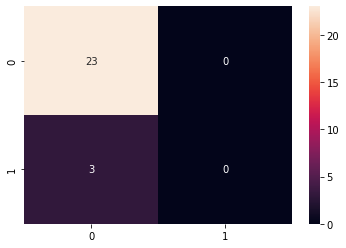

In [112]:
#create the confution matrix 
confusion_matrix(y_test, resultados)
#plot the confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, resultados), annot=True, fmt='d')


usar nuestra clase para saber los demás datos

{'Matriz de Confusión': array([[1026,    6],
        [ 227,   36]], dtype=int64),
 'Precisión Global': 0.8200772200772201,
 'Error Global': 0.17992277992277994,
 'Precisión por categoría':          No        Si
 0  0.994186  0.136882}

In [129]:
m = confusion_matrix(y_test, resultados)
#create a dictionary
d = {'Matriz de Confusión': m, 'Precisión Global' : (m[0,0] + m[1,1]) / (m[0,0] + m[1,1] + m[0,1] + m[1,0]),"Error Global": 1 - (m[0,0] + m[1,1]) / (m[0,0] + m[1,1] + m[0,1] + m[1,0]), 'Precisión por categoría' : (m[0,0] / (m[0,0] + m[0,1]), m[1,1] / (m[1,1] + m[1,0]))}

In [132]:
nuevo_df_clientes_instancia = cmatrixelements(d)

In [133]:
nuevo_df_clientes_instancia.calculatem()

[[23  0]
 [ 3  0]]
0 Global Accuracy Global Error Positive Precision Negative Precision  \
1        0.884615     0.115385                0.0                1.0   

0 False Positives False Negatives Positive Assertivity Negative Assertivity  
1             0.0             1.0                  NaN             0.884615  


,Global Accuracy,Global Error,Positive Precision,Negative Precision,False Positives,False Negatives,Positive Assertivity,Negative Assertivity
1,0.884615,0.115385,0.0,1.0,0.0,1.0,NaN,0.884615


### Ejercicio 3: [25 puntos] Seg ́un el ejemplo de los hiperplanos visto en clase realice lo siguiente:

1. Escriba la regla de clasificaci ́on para el clasificador con margen m ́aximo. Debe ser algo
como lo siguiente: w = (w1, w2, w3) se clasifica como Rojo si ax + by + cz + d > 0 , de otra
manera se clasifica como Azul.

2. Indique la medida del margen entre el hiperplano  ́optimo de separaci ́on y los vectores de
soporte

1

3. Explique por qu ́e un ligero movimiento de la octava observaci ́on no afectar ́ıa el hiperplano
de margen m ́aximo.